# **Activation Function Comparison (MNIST)**

 **Objective**

The goal of this project is to understand and compare the performance of different activation functions in a neural network using the MNIST handwritten digit classification dataset.

📚 **Dataset Used – MNIST**

MNIST is a popular benchmark dataset containing handwritten digits from 0 to 9.

# Activation Functions

The project compares the following activation functions:

- ReLU

- Sigmoid

- Tanh

- Leaky ReLU

- GELU

- Swish



**This Experiment helps to understand:**

- Role of activation functions in neural networks

- Impact of activation functions on training behaviour

- Model benchmarking and evaluation techniques

- Practical deep learning experimentation

# Import Libraies

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import time

# Load MNIST Dataset


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images

In [4]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Custom Swish Activation

Swish is a modern activation function that improves neural network performance by combining linear and non-linear behaviour.

The Swish activation function is mathematically defined as:

$$
\text{Swish}(x) = x \cdot \sigma(x)
$$

where the **Sigmoid function** is:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$


In [5]:
def swish(x):
    return x * tf.nn.sigmoid(x)


#### Sigmoid Function

The sigmoid function maps any real number into a value between **0 and 1**.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

#### Swish Function

Swish multiplies the input value with the sigmoid output:

$$
f(x) = x \cdot \frac{1}{1 + e^{-x}}
$$

---

### Derivative of Swish

Using the product rule:

$$
f(x) = x \sigma(x)
$$

Derivative:

$$
f'(x) = \sigma(x) + x \cdot \sigma(x)(1 - \sigma(x))
$$

---

**Why Swish is Useful**

- Provides smooth gradient flow  
- Helps deep neural networks train efficiently  
- Allows small negative values instead of blocking them completely  

# **Model Builder Function**
This function creates and compiles a neural network model using different activation functions. It allows us to test and compare how each activation function affects model performance.

**What This Function Does**

---

- Selects the activation function based on the input name

- Builds a fully connected neural network

- Uses two hidden layers (256 and 128 neurons)

- Uses Softmax in the output layer for digit classification

- Compiles the model using the Adam optimizer and cross-entropy loss

In [6]:
%%time

def build_model(activation_name):

    if activation_name == "leaky_relu":
        activation_layer = layers.LeakyReLU()
    elif activation_name == "gelu":
        activation_layer = tf.keras.activations.gelu
    elif activation_name == "swish":
        activation_layer = swish
    else:
        activation_layer = activation_name

    model = models.Sequential([
        layers.Dense(256, input_shape=(784,)),
        layers.Activation(activation_layer),

        layers.Dense(128),
        layers.Activation(activation_layer),

        layers.Dense(10, activation="softmax")
    ])

    model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

    return model

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


# **Activation Functions to Test**

This section defines the list of activation functions that will be tested in the experiment. Each activation function will be used to train the same neural network model to compare their performance.

Purpose

- Stores different activation functions to evaluate

- Helps automate training for multiple activations

- Ensures fair comparison using the same model structure

In [7]:
activations = ["relu","sigmoid","tanh","leaky_relu","gelu","swish"]

history_dict = {}
test_results = {}

# Train Models
This section trains the neural network using each activation function defined earlier. It allows us to compare how different activation functions affect model performance.

**What This Loop Does**

- Iterates through each activation function in the list.

- Builds a new model using the selected activation.

---

**Model Training**

- Each activation function is trained using the same model architecture

- Trains the model using training data.

In [8]:
%%time
for act in activations:
    print(f"\nTraining with {act} activation")

    model = build_model(act)

    history = model.fit(x_train, y_train,epochs=5,batch_size=128,validation_split=0.2,verbose=1)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    history_dict[act] = history.history
    test_results[act] = test_acc



Training with relu activation


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8387 - loss: 0.5597 - val_accuracy: 0.9589 - val_loss: 0.1450
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9635 - loss: 0.1233 - val_accuracy: 0.9674 - val_loss: 0.1131
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9778 - loss: 0.0757 - val_accuracy: 0.9711 - val_loss: 0.0985
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9840 - loss: 0.0552 - val_accuracy: 0.9746 - val_loss: 0.0867
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9887 - loss: 0.0366 - val_accuracy: 0.9750 - val_loss: 0.0839

Training with sigmoid activation
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6492 - loss: 1.2389 - val_accuracy: 0.9203 - val_loss: 0.2887
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9201 - loss: 0.2785 - val_accuracy: 0.9379 - val_loss: 0.2143
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9390 - l

**Activation Function Training Results Explanation**

This output shows how different activation functions performed while training a neural network on the MNIST digit classification dataset.


----

**🟠ReLU Activation Function**

Final val_accuracy → 97.50 %
- Fast learning and stable convergence
- Performs very well in deep networks
→ Strong baseline activation

---
**🔵 Sigmoid Activation Function**

Final Validation Accuracy → 96.24%

- Slower training
- Higher loss compared to others
- Suffers from vanishing gradient problem → Performs worst among tested activations
---

🟢 Tanh Activation

Final Validation Accuracy → 97.17%
- Better than sigmoid
- Balanced output between -1 and 1 → Good stability Good traditional activation

---
🟡 Leaky ReLU Activation

Final Validation Accuracy → 96.93%
- Solves dead neuron problem of ReLU
- Slightly lower performance than ReLU → Good alternative to ReLU

---

🟣 GELU Activation

Final Validation Accuracy → 97.53%
- Smooth activation curve
- Used in Transformer models and LLMs
- Shows strong and stable performance → One of the best performing activations

---

🟠 Swish Activation

Final Validation Accuracy → 97.66%
- Smooth gradient flow
- Often outperforms ReLU
- Shows best performance in this experiment → Highest accuracy among tested functions

Training Performance Summary Table
| Activation | Validation Accuracy |
| ---------- | ------------------- |
| ReLU       | 97.50%              |
| Sigmoid    | 96.24%              |
| Tanh       | 97.17%              |
| Leaky ReLU | 96.93%              |
| GELU       | 97.53%              |
| Swish      | **97.66% (Best)** |


# Plot Accuracy Comparison


This section visualizes and compares the validation accuracy of different activation functions across training epochs. It helps to understand how each activation function performs during model learning.

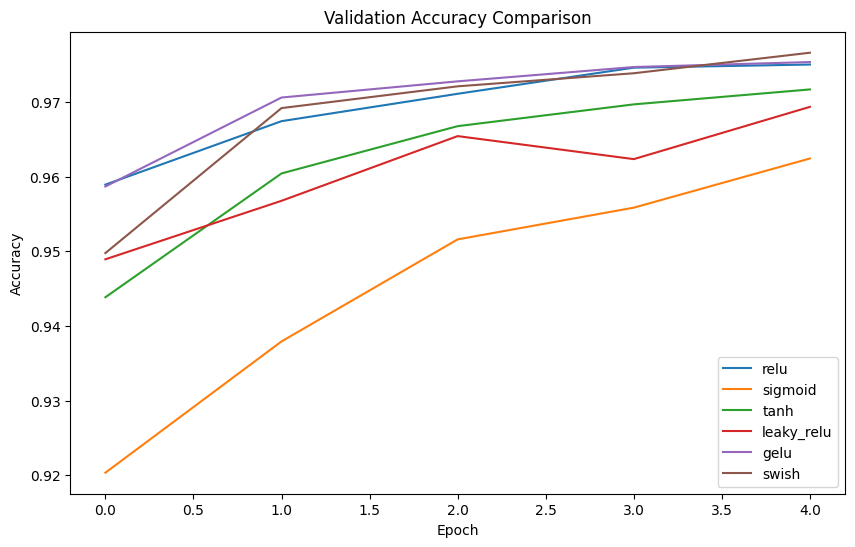

In [9]:
plt.figure(figsize=(10,6))

for act in activations:
    plt.plot(history_dict[act]["val_accuracy"], label=act)

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- X-axis shows number of training epochs
- Y-axis shows validation accuracy

# Loss Graph

This section plots the validation loss of the model during training. Loss measures how far the model’s predictions are from the actual values. Lower loss indicates better model performance

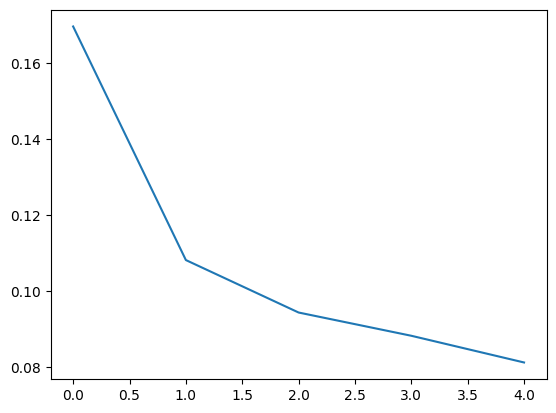

In [10]:
plt.plot(history_dict[act]["val_loss"])

**Why Loss Graph is Important**

- Shows whether model error is decreasing
- Helps detect overfitting or underfitting
- Helps compare learning stability between activation functions

📌 Interpretation

📉 Decreasing Loss → Model is improving

📈 Increasing Loss → Model may be overfitting or unstable

⚖️ Stable Low Loss → Good model performance

# Print Final Test Accuracy


This section displays the final accuracy of each activation function when evaluated on the test dataset. The test dataset contains unseen data, which helps measure how well the model generalizes to new inputs.

In [11]:
print("\nFinal Test Accuracy:")
for act, acc in test_results.items():
    print(f"{act}: {acc:.4f}")


Final Test Accuracy:
relu: 0.9772
sigmoid: 0.9617
tanh: 0.9735
leaky_relu: 0.9722
gelu: 0.9791
swish: 0.9759


These values represent the percentage of correctly classified digits by each activation function.

**Final Test Accuracy**
| Activation Function | Test Accuracy |
| ------------------- | ------------- |
| GELU                | **97.91**% ✔   |
| ReLU                | 97.72%        |
| Swish               | 97.59%        |
| Tanh                | 97.35%        |
| Leaky ReLU          | 97.22%        |
| Sigmoid             | 96.17%        |

 ✔ GELU achieved the highest accuracy

- Provides smooth gradient flow , Often used in modern deep learning models

*ReLU and Swish performed very well*

- ReLU is computationally efficient , Swish improves smooth learning behaviour

*Sigmoid performed the worst*

- Suffers from vanishing gradient problem , Slower learning in deeper networks
